# **Project Name**    - Analyzing Airbnb Bookings in NYC for 2019



##### **Project Type**    - Exploratory Data Analysis
##### **Contribution**    - Individual
##### **Data Analyst** - Arpan Banerjee

# **Project Summary -**

The AirBNB NYC hotel dataset has informations of hotel bookings of the New York city in the year of 2019. It has hotel names in each neighbourhood area with the information of customers who booked and reviewes of the hotels the according to services.

So, our data analysis aims to uncover the trends, valuable information, understand the data and draw some insights which can help both hosts and guests in making informed decisions and run the business succesfully. The factors like number of reviews given by customers, number of days visited by customers that affect the business. We have to dive deep into the data to understand the factors to detect the business gaps and fulfill the business goals.

The process I am going to use is:

EDA(Exploratory Data Analysis): This is a crucial part of the data analysis where the goal is to uncover relationships between variables, identify the trends and patterns from the data, gain valuable insights by creating visuals of the variables. Overall this process helps us to summarize various characteristics of the dataset.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


We are here to explore the the Airbnb NYC hotel dataset which contains hotel information with the customer details and their reviews for the hotels. By exploring the different variables of the dataset We will analyze some important aspects:

*   In which location the hotels are at its best rate.
*   Most and least hotel price based on the locations.
*   What type of room best suitable according to number of guests and affordable price wise.
*   The top 10 hotels with good reviews and services.
*   Expensive and budget-friendly hotels in different locations.
*   Host person details with good and less number of listings.








#### **Define Your Business Objective?**

**Optimize the guest experiences and improve hotel accomodation & services.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [205]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt


### Dataset Loading

In [206]:
# Load Dataset
mdf = pd.read_csv('/content/Airbnb NYC 2019.csv')

### Dataset First View

In [207]:
# Dataset First Look
# Show the first 5 rows of the dataset
mdf.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [208]:
# Show the last 5 rows of the dataset
mdf.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### Dataset Rows & Columns count

In [209]:
# Dataset Rows & Columns count
print(mdf.shape)
print(f'the number of rows {mdf.shape[0]}')
print(f'the number of columns {mdf.shape[1]}')

(48895, 16)
the number of rows 48895
the number of columns 16


### Dataset Information

In [210]:
# Dataset Info
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [211]:
# Dataset Duplicate Value Count
mdf[mdf.duplicated()].shape


(0, 16)

There is no duplicate row

#### Missing Values/Null Values

In [212]:
# Missing Values/Null Values Count
null_df = mdf.isnull().sum().sort_values()
null_df

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
name                                 16
host_name                            21
last_review                       10052
reviews_per_month                 10052
dtype: int64

<Axes: >

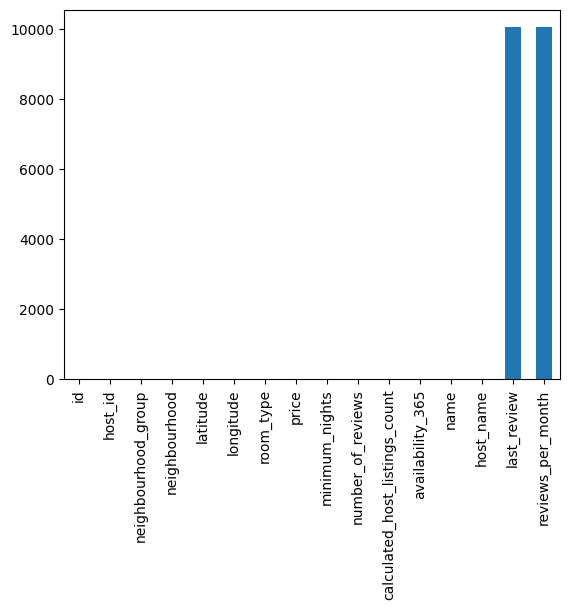

In [213]:
# Visualizing the missing values count
null_df.plot(kind='bar')

I can observe that there are 2 columns (last_review, reviews_per_month) have missing values.

So, I can fill the missing values of reviews_per_month with the median value of this column but I cannot fill the missing values of last_review(date) column.

In [214]:
# Filling null values with median value
review_per_month_median = mdf['reviews_per_month'].median()
print(f'The median value of review_per_month is {review_per_month_median}')

# Dataset info after filling null values
mdf['reviews_per_month'].fillna(review_per_month_median, inplace=True)
mdf.info()

The median value of review_per_month is 0.72
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  

In [215]:
# Drop null values rows from dataset because of not having "last_review" (review date) for some rows.
mdf.shape
mdf.dropna(inplace=True)

In [216]:
# Checking the null value count after dropping the null/missing value rows
mdf.isnull().sum().sort_values()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [217]:
# Shape of the dataframe after dropping the null values
mdf.shape

(38821, 16)

In [218]:
# Drop the price values where price=0
ndf = mdf[mdf['price']!=0]
ndf

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,07-07-2019,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,07-07-2019,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,07-07-2019,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,07-07-2019,2.00,1,40


In [219]:
# Check the shape of dataset after dropping the rows where 'price'=0
ndf.shape

(38811, 16)

### What did you know about your dataset?

The dataset contains hotel information location wise in New York City. It has hotel's host, customer records of visting and customers' reviews. The datset consists of 38,811 rows and 16 columns after cleaning the null/missing values.

Our goal is to explore the dataset & optimize the guest experiences by looking at the reviews and number of times visit to improve the hotel business and make it profitable.

## ***2. Understanding Your Variables***

In [220]:
# Dataset Columns
list(ndf.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [221]:
# Describing the Dataset
ndf.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.881100e+04,3.881100e+04,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000
mean,1.810018e+07,6.424611e+07,40.728134,-73.951157,142.369199,5.868723,29.288088,1.373135,5.166757,114.881631
std,1.069502e+07,7.590371e+07,0.054992,0.046695,197.006883,17.390315,48.184653,1.680276,26.306326,129.535406
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720894e+06,7.028184e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887173e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756998e+07,1.018872e+08,40.762995,-73.935030,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

**id:** The hotel id. `numerical`

**name:** The hotel names. `categorical`

**host_id:** Host/owner id of hotels. `numerical`

**host_name:** Host/owner name of hotels. `categorical`

**neighbourhood_group:** Larger geographical area in New York city. `categorical`

**neighbourhood:** Small areas under neighbourhood_group areas. `categorical`

**latitude:** Measure of distance north or south of the equator. `numerical`

**longitude:** Measure of distance east or west of the prime meridian. `numerical`

**room_type:** Types of room available in hotels. `categorical`

**price:** Hotel price. `numerical`

**minimum_nights:** Minimum number of nights a guest is required to book when reserving a listing. `numerical`

**number_of_reviews:** Number of reviews for the hotel given by customers. `numerical`

**last_review:** The date when the last review is given. `date`

**reviews_per_month:** Average number of reviews that a listing receives per month. `numerical`

**calculated_host_listings_count:** The total number of listings that a particular host has on the Airbnb platform. `numerical`

**availability_365:** The number of days in a year that a particular listing(customer) is available for booking. `numerical`

### Check Unique Values for each variable.

In [222]:
# Check Unique Values for each variable.
for i in ndf.columns.tolist():
  print(f'No of unique values of {i} is {ndf[i].nunique()} .')

No of unique values of id is 38811 .
No of unique values of name is 38234 .
No of unique values of host_id is 30231 .
No of unique values of host_name is 9884 .
No of unique values of neighbourhood_group is 5 .
No of unique values of neighbourhood is 218 .
No of unique values of latitude is 17434 .
No of unique values of longitude is 13637 .
No of unique values of room_type is 3 .
No of unique values of price is 580 .
No of unique values of minimum_nights is 89 .
No of unique values of number_of_reviews is 393 .
No of unique values of last_review is 1764 .
No of unique values of reviews_per_month is 937 .
No of unique values of calculated_host_listings_count is 47 .
No of unique values of availability_365 is 366 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [223]:
# Write your code to make your dataset analysis ready.
# Create a copy of the dataset for data wrangling purpose
dataset = ndf.copy()
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,07-07-2019,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,07-07-2019,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,07-07-2019,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,07-07-2019,2.00,1,40


In [224]:
# 1
# Total hotel Price for each neighbourhood group wise

neighbourwise_total_price = pd.DataFrame(dataset.groupby('neighbourhood_group')['price'].sum())

# reset the index value in new dataframe
neighbourwise_total_price.reset_index(inplace=True)

# rename the column 'hotel_price'
neighbourwise_total_price.rename(columns={'price':'total_hotel_price', 'neighbourhood_group':'neighbourhood_group'},inplace=True)

# sort the total_hotel_price
neighbourwise_total_price.sort_values(by='total_hotel_price', ascending=False).reset_index(drop=True)

,neighbourhood_group,total_hotel_price
0,Manhattan,2992970
1,Brooklyn,1996735
2,Queens,437923
3,Bronx,69614
4,Staten Island,28249


In [225]:
#2
# Average hotel price for each neighbourhood group wise

neighbourwise_avg_price = pd.DataFrame(dataset.groupby('neighbourhood_group')['price'].mean())

neighbourwise_avg_price.reset_index(inplace=True)

# rename the column 'price'
neighbourwise_avg_price.rename(columns={'price':'average_hotel_price'},inplace=True)

# sort the average_hotel_price
neighbourwise_avg_price.sort_values(by='average_hotel_price', ascending=False).reset_index(drop=True)

,neighbourhood_group,average_hotel_price
0,Manhattan,180.071596
1,Brooklyn,121.529823
2,Queens,95.783683
3,Staten Island,89.964968
4,Bronx,79.649886


In [226]:
#3
# Average hotel price for each room_type wise

roomtypewise_price = pd.DataFrame(dataset.groupby('room_type')['price'].mean())

roomtypewise_price.reset_index(inplace=True)

roomtypewise_price

,room_type,price
0,Entire home/apt,196.325591
1,Private room,84.018587
2,Shared room,63.363744


In [227]:
#4
# Average number_of_reviews each neighbourhood_group wise

neighbourwise_avg_reviews = pd.DataFrame(dataset.groupby('neighbourhood_group')['number_of_reviews'].mean())

neighbourwise_avg_reviews.reset_index(inplace=True)

# sort according to number_of_reviews
neighbourwise_avg_reviews.sort_values(by='number_of_reviews',ascending=False).reset_index(drop=True)

,neighbourhood_group,number_of_reviews
0,Staten Island,36.754777
1,Queens,34.318023
2,Bronx,32.355835
3,Brooklyn,29.571029
4,Manhattan,27.322423


In [228]:
# Drop the rows where hotel name is invalid "#NAME?"

drop_data = dataset[dataset['name']=='#NAME?'].index

dataset.drop(drop_data, inplace=True)


In [229]:
#5
# Most number_of_reviewed according to hotel name wise
most_reviewed_hotel = pd.DataFrame(dataset.groupby(['name']).agg({'number_of_reviews':'sum'}))
most_reviewed_hotel.reset_index(inplace=True)

# Rename the column name 'name' to 'Hotel_Name'
most_reviewed_hotel.rename(columns={'name':'hotel_name'},inplace=True)

# Fetch the top 10 hotel names with reviews
Most_reviewed_hotels = most_reviewed_hotel.sort_values(by='number_of_reviews', ascending=False).head(10)
Most_reviewed_hotels.reset_index(drop=True)

,hotel_name,number_of_reviews
0,Private Bedroom in Manhattan,666
1,Room near JFK Queen Bed,629
2,Beautiful Bedroom in Manhattan,617
3,Great Bedroom in Manhattan,607
4,Room Near JFK Twin Beds,576
5,Steps away from Laguardia airport,543
6,Manhattan Lux Loft.Like.Love.Lots.Look !,540
7,Cozy Room Family Home LGA Airport NO CLEANING FEE,510
8,Private brownstone studio Brooklyn,488
9,Loft Suite @ The Box House Hotel,481


In [230]:
#6
# Most expensive hotels and Least expensive hotels neighbood group wise
Costly_hotel1 = pd.DataFrame(dataset.sort_values(by='price',ascending=False).groupby('neighbourhood_group').head(1).reset_index(drop=True))
Costly_hotel2 = pd.DataFrame(dataset.sort_values(by='price',ascending=False).groupby('neighbourhood_group').tail(1).reset_index(drop=True))

# Fetch the Most expensive hotel name neighbourhood_group wise
costly_df1 = Costly_hotel1[['neighbourhood_group','name','price']]
costly_df2 = Costly_hotel2[['neighbourhood_group','name','price']]

Expensive_hotel = pd.concat([costly_df1, costly_df2])

# Rename the columns to hotel name and hotel price
Expensive_hotel.rename(columns={'name':'hotel_name', 'price':'hotel_price'}, inplace=True)

Expensive_hotel.sort_values(by=['neighbourhood_group']).reset_index(drop=True)


,neighbourhood_group,hotel_name,hotel_price
0,Bronx,New York's Hidden Secret for luxury living,800
1,Bronx,Sleeper shared rm on subway bronx zoo 30m2NYC,20
2,Brooklyn,Luxury 1 bedroom apt. -stunning Manhattan views,10000
3,Brooklyn,Gigantic Sunny Room in Park Slope-Private Back...,10
4,Manhattan,Spanish Harlem Apt,9999
5,Manhattan,"Quiet, Cozy UES Studio Near the Subway",10
6,Queens,Furnished room in Astoria apartment,10000
7,Queens,IT'S SIMPLY CONVENIENT!,10
8,Staten Island,"Wedding guests accommodations, 3-7 bedrooms",625
9,Staten Island,Happy Home 3,13


In [231]:
#7
# Top 20 host_id, host_name with total number of calculated_host_listings_count in Airbnb platform

top_host_listing_count = pd.DataFrame(dataset.groupby(['host_id','host_name'])['calculated_host_listings_count'].sum())

top_host_listing_count.reset_index(inplace=True)

#pd.set_option('display.max_rows', None)

top_host_listing_count.sort_values(by='calculated_host_listings_count', ascending=False).head(20).reset_index(drop=True)

,host_id,host_name,calculated_host_listings_count
0,219517861,Sonder (NYC),67689
1,61391963,Corporate Housing,7189
2,107434423,Blueground,6496
3,16098958,Jeremy & Laura,5856
4,137358866,Kazuya,5253
5,30283594,Kara,5203
6,22541573,Ken,3393
7,12243051,Sonder,2784
8,7503643,Vida,2548
9,1475015,Mike,2184


In [232]:
#8
# Last 20 host_id, host_name with total number of calculated_host_listings_count in Airbnb platform

least_host_listing_count = pd.DataFrame(dataset.groupby(['host_id','host_name'])['calculated_host_listings_count'].sum())

least_host_listing_count.reset_index(inplace=True)

#pd.set_option('display.max_rows', None)

least_host_listing_count.sort_values(by='calculated_host_listings_count', ascending=False).tail(20).reset_index(drop=True)

,host_id,host_name,calculated_host_listings_count
0,12762193,Jenny,1
1,12760201,Megan,1
2,12759735,Natalie,1
3,12749467,Naomi,1
4,12748942,Veronica Gallardo,1
5,12745771,Amanda,1
6,12741400,Manon,1
7,12739246,Pete,1
8,12732806,Jerome,1
9,12732385,Asaf,1


### What all manipulations have you done and insights you found?

I have done some manipulations here to extract some information from the dataset like:

1. Total hotel Price for each neighbourhood group wise

2. Average hotel Price for each neighbourhood group wise

3. Average Hotel price for each room_type wise

4. Most number_of_reviewed according to hotel name wise

5. Most expensive hotels and Least expensive hotels neighbood group wise

6. Top 20 host_id, host_name with total number of calculated_host_listings_count in Airbnb platform







## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

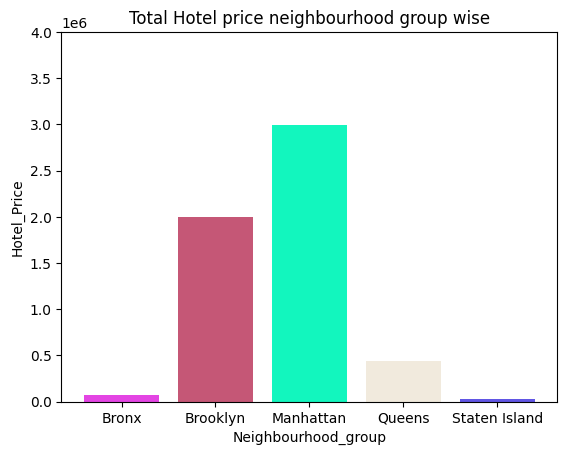

In [233]:
# Chart - 1 visualization code
# Total hotel Price for each neighbourhood group

plt.bar(neighbourwise_total_price['neighbourhood_group'],neighbourwise_total_price['total_hotel_price'], color=np.random.rand(len(neighbourwise_total_price['neighbourhood_group']),3))
plt.xlabel('Neighbourhood_group')
plt.ylabel('Hotel_Price')
plt.title('Total Hotel price neighbourhood group wise')
plt.ylim(0,4000000)
plt.show()


##### 1. Why did you pick the specific chart?

I picked up the bar chart to plot this because the dataframe consists of one categorical and one numerical value.

##### 2. What is/are the insight(s) found from the chart?

Overall I can find the cost of hotels is highest in **Manhattan** area whereas the cost is very inexpensive/affordable in **Bronx and Staten Island**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight might not create a positive business impact. Because of high price of hotels customers who earn below the average income might not afford in Manhattan area. But also engagement of customers depends on the hotel service and facilities.

#### Chart - 2

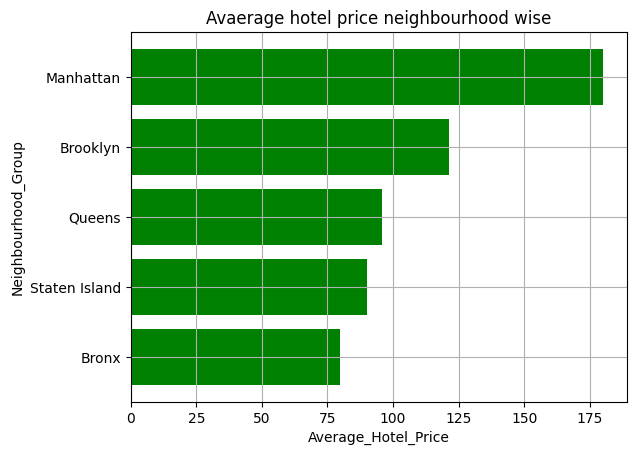

In [234]:
# Chart - 2 visualization code
# Average hotel Price for each neighbourhood
sorted_df = neighbourwise_avg_price.sort_values(by='average_hotel_price', ascending=True)
plt.barh(sorted_df['neighbourhood_group'],sorted_df['average_hotel_price'], color='green')
plt.xlabel('Average_Hotel_Price')
plt.ylabel('Neighbourhood_Group')
plt.title('Avaerage hotel price neighbourhood wise')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

I chose this chart because of combination of one categorical value and one numerical value.

##### 2. What is/are the insight(s) found from the chart

As we saw that total hotel is highest in **Manhattan**; similarly average price of hotel is also highest in **Manhattan**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps Airbnb to get the location from where it gets most revenue.

#### Chart - 3

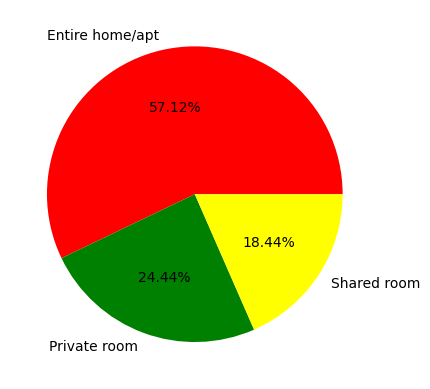

In [235]:
# Chart - 3 visualization code
# Hotel price for each room_type
colors = ['red', 'green', 'yellow']

# Create a pie chart
plt.pie(roomtypewise_price['price'], labels=roomtypewise_price['room_type'], autopct = '%1.2f%%' , colors=colors)
#autopct=lambda p: str('{:1.2f}'.format(p * sum(roomtypewise_price['price']) / 100)), colors=colors)

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

I have picked up the Pie-chart to show the percentage of price of the categorical/ labels values **"room_type"**.

##### 2. What is/are the insight(s) found from the chart?

By observing the pie-chart we can come up with that customers mostly book **"Entire home/apt"** compared to **"Shared room"** or **"Private room"**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this observation impacts positively. So, booking more **"Entire home/apt"** makes the business profitable for **Airbnb**.

There is nothing leads to negative growth or negative impact.

#### Chart - 4

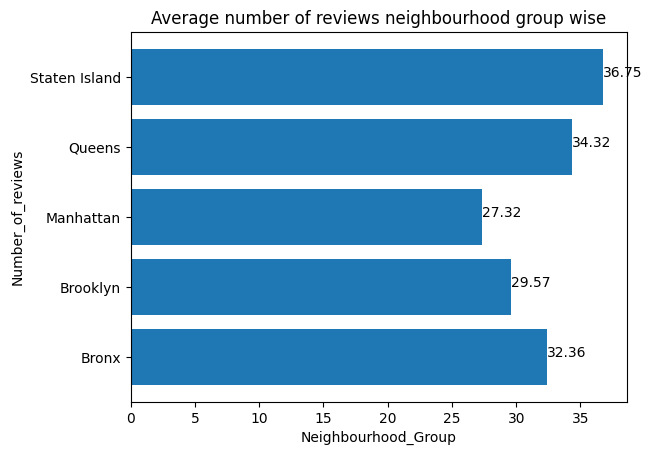

In [236]:
# Chart - 4 visualization code
# Average number of reviews neighbourhood group wise

plt.barh(neighbourwise_avg_reviews['neighbourhood_group'], neighbourwise_avg_reviews['number_of_reviews'])
plt.xlabel('Neighbourhood_Group')
plt.ylabel('Number_of_reviews')
plt.title('Average number of reviews neighbourhood group wise')

# To show the number_of_reviews labels on each bar

for index, value in enumerate(neighbourwise_avg_reviews['number_of_reviews']):
  plt.text(value, index, round(value,2), color='black')
plt.show()

##### 1. Why did you pick the specific chart?

The reason to pick this chart combination of one categorical value and one numerical value.

##### 2. What is/are the insight(s) found from the chart?

From this chart I can say that **"number_of_reviews"** given by customers is very less in **Manhattan** area compared to other neighbourhood_groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Previously we observed the hotel price is highest in Manhattan area among all other neighbourhood_group areas. But the customer reviews are less in Manhattan, this shows hotel services maynot be well enough or the accomodation charges are not worthy on the specific charges of hotels in Manhattan. Though the business is going good enough in Staten Island, Queens and Bronx areas.

Airbnb hotel authority should look into the hotels in Manhattan and take actions for improving business.

#### Chart - 5

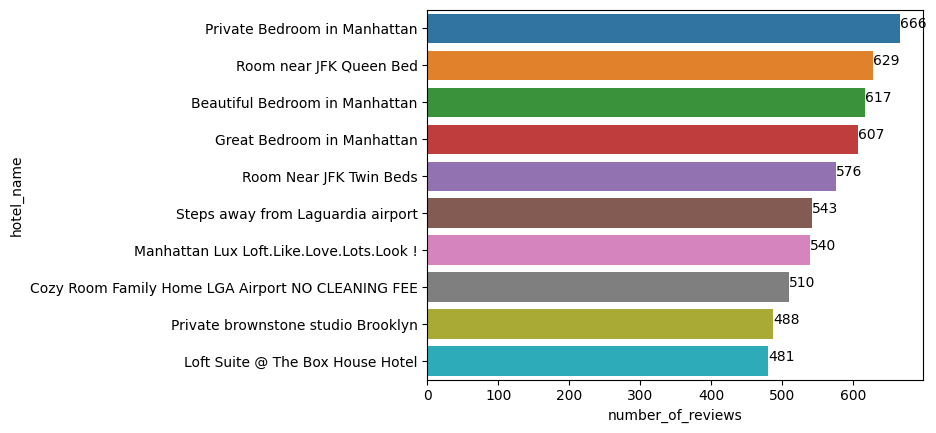

In [237]:
# Chart - 5 visualization code
# Most number_of_reviewed hotel name wise
sb.barplot(x=Most_reviewed_hotels['number_of_reviews'], y=Most_reviewed_hotels['hotel_name'])

for index, value in enumerate(Most_reviewed_hotels['number_of_reviews']):
  plt.text(value, index, str(value), color='black')
plt.show()


##### 1. Why did you pick the specific chart?

This is a bar plot which needs one categorical value and one numerical value.

##### 2. What is/are the insight(s) found from the chart?

So here the insight is top 10 hotels with most number_of_reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Gained insights show the hotel names with more reviews which means good services. **"Private bedroom in Manhattan"** is at the top has more number_of_reviews so this hotel along with 9 others provides good facilities.

#### Chart - 6

Text(0.5, 1.0, 'Range of minimum hotel price to maximum hotel price neighbourhood_group wise')

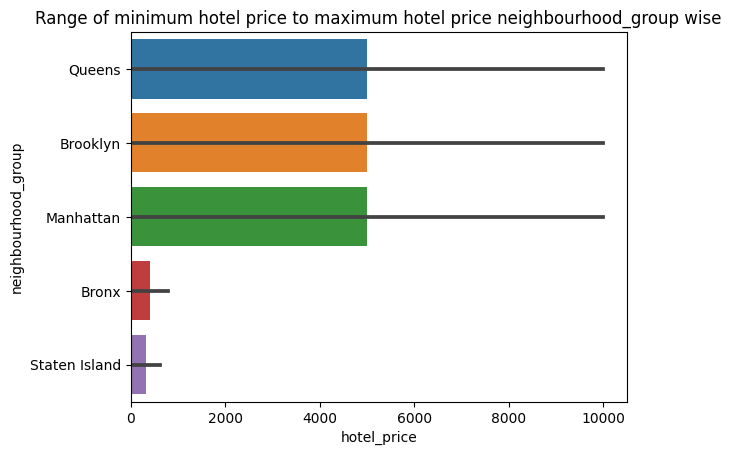

In [238]:
# Chart - 6 visualization code
# Most expensive hotels and Least expensive hotels neighbood group wise
sb.barplot(y=Expensive_hotel['neighbourhood_group'], x=Expensive_hotel['hotel_price'])
plt.title('Range of minimum hotel price to maximum hotel price neighbourhood_group wise')

##### 1. Why did you pick the specific chart

I decided to go with horizontal barplot of Seaborn libraray. This is chosen to show the range of numerical_value parameter between minimum and maximum values.


##### 2. What is/are the insight(s) found from the chart?

**In Bronx area:**
*Most_expensive_hotel:* New York's Hidden Secret for luxury living	**Price-**800$

*Least_exepensive_hotel:* Sleeper shared rm on subway bronx zoo 30m2NYC	**Price-**20$

**In Brooklyn area:**
Most_expensive_hotel: Luxury 1 bedroom apt. -stunning Manhattan views	**Price-**10000

*Least_exepensive_hotel:* Gigantic Sunny Room in Park Slope-Private Back...	**Price-**10$

**In Manhattan area:**
*Most_expensive_hotel:* Spanish Harlem Apt	**Price-**9999$

*Least_exepensive_hotel:* Quiet, Cozy UES Studio Near the Subway	**Price-**10$

**In Queens area:**
*Most_expensive_hotel:* Furnished room in Astoria apartment	**Price-**10000$

*Least_exepensive_hotel:* IT'S SIMPLY CONVENIENT!	**Price-**10$

**In Staten Island area:**
*Most_expensive_hotel:* Wedding guests accommodations, 3-7 bedrooms	**Price-**625$

*Least_exepensive_hotel:* Happy Home 3	**Price-**13$

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This can help the hotel authority to know the most engagement of customers in the hotels and survey the issue to resolve the problems for running business smoothly.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


In my opinion I can suggest that make the hotel prices affordable for everyone and keep the services at its best in all the locations. Try to provide discounts with some extra service for most often vistors and find the loopholes in the business where customers are giving negative/ no reviews which would be the first and forth priority.  

# **Conclusion**

Finally after doing all the manipulation and analysis in conclusion some insights have been identified to improve the business:

* Price distribution of hotels among different geo location of New York city.
* Popular top 10 hotels with more number of customer reviews grab the top positions in Good hotels list.
* Budget-friendly hotels for customers according to hotel prices.
* The number of listings count records of each host_id/ host_name helps Airbnb authority to find the best host management and servvice wise.

  

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***